## Hypothesis 4
To predict the incentive level requested for letting utility companies lower thermostat settings for 2-3 F when being at home in winter

### Filter: HomeWYN=1(i.e,ony use people who use heaters when being at home in winter)

In [1]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeW==99] = NA;

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeWYN==1,-which(names(data) %in% c("HomeWYN","HomeSYN","AwayWNY","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","SqftCate","Attitude","Trust",
    "EnergyC","MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN","Latitude",
    "Longitude", "Job","hot","cold","Ethnic"))];
sort(names(survey))

[1] "ACYN"        "Age"         "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "AwaySNY"     "AwayW"      
 [11] "AwayWNY"     "BillS"       "BillW"       "City"        "ComfNS1"    
 [16] "ComfNS2"     "ComfNS3"     "ComfNW1"     "ComfNW2"     "ComfortS"   
 [21] "ComfortW"    "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"  
 [26] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [31] "DeviceType"  "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [36] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"     
 [41] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HTdevice"   
 [46] "HTsource"    "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [51] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [56] "HabitE3"     "HeatYN"      "HomeS"       "HomeSYN"     "HomeW"      
 [61] "HomeWYN"     "HouseholdS"  "ID"          "INT1"        "INT2"       
 [66] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [71] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [76] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [81] "Job"         "Latitude"    "Longitude"   "MC1"         "MC2"        
 [86] "MC3"         "MC4"         "MC5"         "MCBill"      "MCG"        
 [91] "NBillS"      "NBillW"      "OwnRent"     "PBC"         "PBC1"       
 [96] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "PBillStatus"
[101] "Political"   "ReasonNeg"   "ReasonPos"   "RewardForm"  "SN1"        
[106] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
[111] "State"       "SubN"        "SubNorm1"    "SubNorm2"    "SubNorm3"   
[116] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[121] "Utility"     "X.9to5"      "cold"        "hot"         "valid"      
[126] "valid1"      "valid2"

In [2]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeS" "113"  
[1] "AwayW" "72"   
[1] "AwayS" "202"  
[1] "IncHomeS" "2"       
[1] "IncWD" "71"   
[1] "IncDish" "226"    
[1] "Age" "4"  
[1] "OwnRent" "2"      
[1] "BillS" "2"    
[1] "BillW" "2"    
[1] "Sqft" "2"   
[1] "HouseholdS" "2"         
[1] "Political" "2"        
[1] "Income" "5"     
[1] "Educ" "7"   


In [3]:
#lets remove these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))

[1] 747  83
[1] 623  83


In [4]:
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"BillS",
"NBillS",
"Sqft",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"MC1",
"MC2",
"MC3",
"MC4",
"MC5",
"Frugal1",
"Frugal2",
"Frugal3",
"Trust1",
"Trust2",
"Trust3",
"Trust4",
"ComfNS1",
"ComfNS2",
"ComfNS3",
"ConvB1",
"ConvB2",
"ConvB3",
"ConvB4",
"ControlN1",
"ControlN2R",
"ControlN3",
"ControlN4",
"Atti1",
"Atti2",
"Atti3",
"Atti4",
"SubNorm1",
"SubNorm2",
"SubNorm3",
"PBC1",
"PBC2",
"PBC3R",
"PBC4",
"PBC5",
"SN1",
"SN2",
"SN3",
"SN4",
"HabitC1",
"HabitC2",
"HabitC3",
"HabitC4",
"HabitC5",
"HabitC6",
"HabitC7",
"HabitE1",
"HabitE2",
"HabitE3")

In [5]:
data1 <- data[data$HomeWYN==1,c("IncAutoW",IVS)];

names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}

[1] "IncAutoW"   "Age"        "Gender"     "OwnRent"    "BillS"     
 [6] "NBillS"     "Sqft"       "SqftCate"   "HouseholdS" "Political" 
[11] "Ethnic"     "Income"     "Educ"       "MC1"        "MC2"       
[16] "MC3"        "MC4"        "MC5"        "Frugal1"    "Frugal2"   
[21] "Frugal3"    "Trust1"     "Trust2"     "Trust3"     "Trust4"    
[26] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ConvB1"     "ConvB2"    
[31] "ConvB3"     "ConvB4"     "ControlN1"  "ControlN2R" "ControlN3" 
[36] "ControlN4"  "Atti1"      "Atti2"      "Atti3"      "Atti4"     
[41] "SubNorm1"   "SubNorm2"   "SubNorm3"   "PBC1"       "PBC2"      
[46] "PBC3R"      "PBC4"       "PBC5"       "SN1"        "SN2"       
[51] "SN3"        "SN4"        "HabitC1"    "HabitC2"    "HabitC3"   
[56] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
[61] "HabitE2"    "HabitE3"

[1] "Age" "4"  
[1] "OwnRent" "2"      
[1] "BillS" "2"    
[1] "NBillS" "2"     
[1] "Sqft" "2"   
[1] "SqftCate" "2"       
[1] "HouseholdS" "2"         
[1] "Political" "2"        
[1] "Ethnic" "2"     
[1] "Income" "5"     
[1] "Educ" "7"   


In [6]:
data2 <- data1;
data2 <- na.omit(data2)

In [7]:
hiCor(data2,.75)

,BillS,NBillS,Sqft,SqftCate,MC1,MC2,Trust1,Trust3,Trust4,ComfNS1,ComfNS3,Atti1,Atti2,Atti3,Atti4,PBC2,PBC4,SN1,SN2
BillS,1.000,0.969,0.39683,0.3869,-0.048,-0.090,-0.1445,-0.15879,-0.137,0.317,0.26327,-0.0669,-0.0630,-0.0690,-0.0548,-0.087,-0.058,0.04344,0.0568
NBillS,0.969,1.000,0.38486,0.3752,-0.043,-0.089,-0.1428,-0.15010,-0.134,0.304,0.25280,-0.0695,-0.0694,-0.0717,-0.0502,-0.100,-0.078,0.05411,0.0655
Sqft,0.397,0.385,1.00000,0.9690,0.134,0.086,0.0116,-0.00013,0.033,0.045,0.01566,0.0244,-0.0013,0.0104,0.0014,-0.080,-0.051,0.11368,0.0946
SqftCate,0.387,0.375,0.96904,1.0000,0.130,0.071,0.0063,-0.00804,0.027,0.044,0.01152,0.0094,-0.0158,-0.0081,-0.0165,-0.069,-0.042,0.11445,0.1005
MC1,-0.048,-0.043,0.13362,0.1298,1.000,0.799,0.1438,0.08135,0.146,-0.050,-0.08531,0.1100,0.0732,0.0903,0.1172,0.072,0.091,0.06977,0.0597
MC2,-0.090,-0.089,0.08552,0.0714,0.799,1.000,0.1365,0.07931,0.134,-0.076,-0.07386,0.1080,0.0556,0.0727,0.1086,0.098,0.134,0.06369,0.0421
Trust1,-0.144,-0.143,0.01157,0.0063,0.144,0.137,1.0000,0.79375,0.913,-0.033,-0.06512,0.1290,0.1044,0.1418,0.1228,0.084,0.107,0.21051,0.2239
Trust3,-0.159,-0.150,-0.00013,-0.0080,0.081,0.079,0.7937,1.00000,0.780,-0.022,-0.04076,0.1276,0.1193,0.1309,0.1340,0.061,0.057,0.21472,0.2267
Trust4,-0.137,-0.134,0.03346,0.0266,0.146,0.134,0.9130,0.78008,1.000,-0.037,-0.07200,0.1258,0.1032,0.1376,0.1357,0.082,0.108,0.22157,0.2110
ComfNS1,0.317,0.304,0.04515,0.0435,-0.050,-0.076,-0.0327,-0.02221,-0.037,1.000,0.77360,-0.0813,-0.0713,-0.0465,-0.0683,0.023,0.016,-0.00402,0.0129


In [8]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:40];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:40){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}

[1] 0.13
      MC5 Frugal1 Frugal3 ConvB1 Atti1 Atti2 Atti3 Atti4
PC1 -0.21   -0.21    -0.2    0.2 -0.25 -0.24 -0.24 -0.24
[1] 0.2
    OwnRent Sqft SqftCate Trust1 Trust2 Trust3 Trust4  SN1  SN2  SN4
PC2     0.2 0.21     0.24   0.25   0.21   0.26   0.25 0.26 0.26 0.22
[1] 0.26
    BillS NBillS Sqft SqftCate ComfNS1 ComfNS2 ComfNS3
PC3  0.29   0.32 0.21     0.25    0.27    0.26    0.25
[1] 0.31
    Trust1 Trust2 Trust3 Trust4 ComfNS1 ComfNS2 ComfNS3  PBC2  PBC4  PBC5
PC4  -0.28  -0.29  -0.25  -0.28   -0.23   -0.22   -0.25 -0.23 -0.22 -0.24
[1] 0.35
    OwnRent Income  MC1   MC2 ComfNS1 ComfNS2 ComfNS3  SN1  SN2 SN3  SN4
PC5   -0.22  -0.23 -0.3 -0.29    0.25    0.21    0.25 0.24 0.24 0.2 0.25
[1] 0.39
     MC1   MC2 ConvB2 ConvB3 ConvB4 ControlN4 HabitC1
PC6 -0.2 -0.24  -0.28  -0.34  -0.34     -0.22     0.2
[1] 0.43
    Frugal2 Trust2 Atti1 Atti2 Atti3 Atti4   SN1   SN2   SN4
PC7    0.21   0.21   0.2   0.2  0.24  0.23 -0.25 -0.25 -0.23
[1] 0.46
     MC2  MC4 PBC1 PBC2 PBC3R PBC4 PBC5 Hab

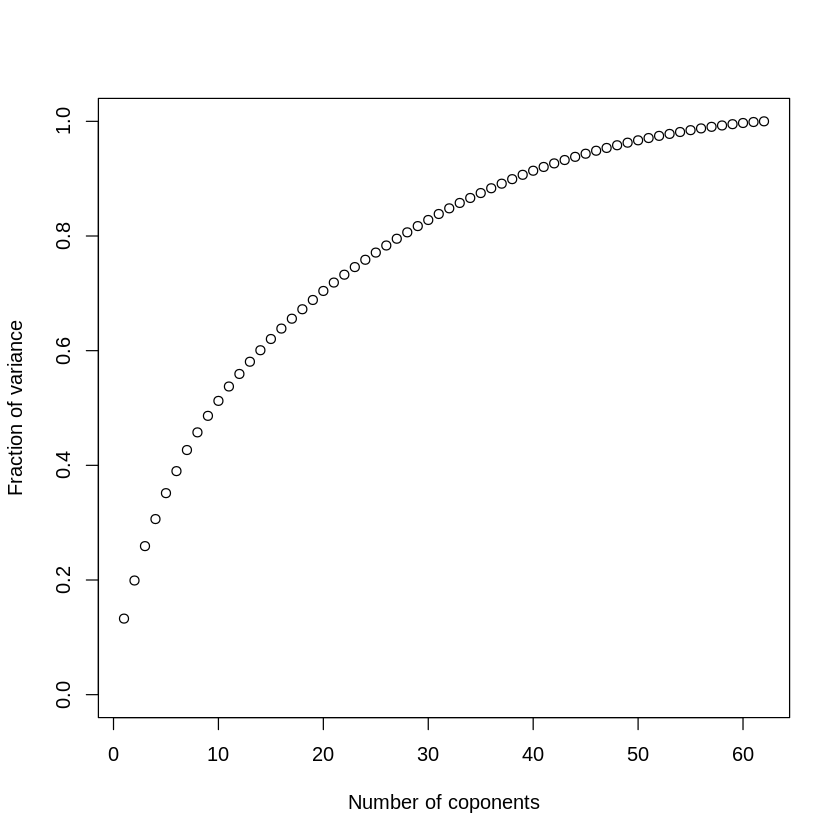

In [9]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [10]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

SqftCate,8,0.68
MC2,15,0.68
MC1,14,0.67
Trust2,23,0.65
ComfNS2,27,0.64
SN4,52,0.61
Sqft,7,0.59
Frugal2,20,0.59
SubNorm2,42,0.59
Frugal3,21,0.57
ConvB4,32,0.57


In [11]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])
fmla <- as.formula(paste("IncAutoW",paste(IndepPred,collapse="+"),sep="~"));
table(data2[,"IncAutoW"])


  1   2   3   4   5   6   7   8 
 54  99 134 180  69  55  57  86 

In [12]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.705 -1.410 -0.206  1.334  4.975 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.14e+00   1.33e+00    0.86   0.3912    
SqftCate     8.81e-02   1.12e-01    0.79   0.4309    
MC2         -2.13e-01   8.07e-02   -2.64   0.0086 ** 
MC1          1.53e-01   7.64e-02    2.00   0.0457 *  
Trust2      -9.06e-02   5.53e-02   -1.64   0.1016    
ComfNS2      6.59e-02   4.39e-02    1.50   0.1335    
SN4          8.74e-02   5.60e-02    1.56   0.1190    
Sqft         8.86e-05   1.08e-04    0.82   0.4122    
Frugal2     -3.38e-05   9.21e-02    0.00   0.9997    
SubNorm2     4.32e-02   7.14e-02    0.60   0.5458    
Frugal3      1.27e-02   9.62e-02    0.13   0.8948    
ConvB4      -4.32e-02   6.16e-02   -0.70   0.4835    
MC5         -3.44e-02   9.29e-02   -0.37   0.7108    
Frugal1      6.57e-02   1.17e-01    0.56   0.5750    
ConvB1      -1.99e-02   8.05e-02   -0.25   0.8048  

In [13]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
SqftCate,1,2.7e+01,27.055,7.1202,7.8e-03
MC2,1,2.0e+01,20.249,5.3289,2.1e-02
MC1,1,2.1e+00,2.105,0.5540,4.6e-01
Trust2,1,2.3e+01,23.268,6.1235,1.4e-02
ComfNS2,1,3.9e+01,38.809,10.2134,1.5e-03
SN4,1,3.1e+00,3.072,0.8084,3.7e-01
Sqft,1,2.1e-01,0.211,0.0554,8.1e-01
Frugal2,1,1.7e-01,0.173,0.0455,8.3e-01
SubNorm2,1,8.4e+00,8.355,2.1987,1.4e-01
Frugal3,1,2.7e-01,0.267,0.0703,7.9e-01


In [14]:
mod = lm(IncAutoW~ComfNS3+Age,data=data2)
summary(mod)


Call:
lm(formula = IncAutoW ~ ComfNS3 + Age, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.034 -1.531 -0.357  1.488  4.572 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.92484    0.30433    9.61  < 2e-16 ***
ComfNS3      0.15873    0.04132    3.84  0.00013 ***
Age          0.01720    0.00672    2.56  0.01063 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2 on 731 degrees of freedom
Multiple R-squared:  0.0303,	Adjusted R-squared:  0.0276 
F-statistic: 11.4 on 2 and 731 DF,  p-value: 1.31e-05


In [15]:
mod = lm(IncAutoW~ComfNS3+Age+Political,data=data2)
summary(mod)


Call:
lm(formula = IncAutoW ~ ComfNS3 + Age + Political, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.010 -1.524 -0.343  1.470  4.560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.98327    0.33040    9.03  < 2e-16 ***
ComfNS3      0.16097    0.04164    3.87  0.00012 ***
Age          0.01713    0.00672    2.55  0.01102 *  
Political   -0.01565    0.03434   -0.46  0.64877    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2 on 730 degrees of freedom
Multiple R-squared:  0.0306,	Adjusted R-squared:  0.0266 
F-statistic: 7.67 on 3 and 730 DF,  p-value: 4.71e-05


In [16]:
mod = lm(IncAutoW~ComfNS3+Age+Political+HabitC2,data=data2)
summary(mod)


Call:
lm(formula = IncAutoW ~ ComfNS3 + Age + Political + HabitC2, 
    data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.079 -1.522 -0.355  1.487  4.568 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.25936    0.41200    7.91  9.5e-15 ***
ComfNS3      0.15876    0.04168    3.81  0.00015 ***
Age          0.01711    0.00672    2.55  0.01113 *  
Political   -0.01617    0.03434   -0.47  0.63785    
HabitC2     -0.04666    0.04161   -1.12  0.26251    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2 on 729 degrees of freedom
Multiple R-squared:  0.0322,	Adjusted R-squared:  0.0269 
F-statistic: 6.07 on 4 and 729 DF,  p-value: 8.28e-05


In [17]:
mod = lm(IncAutoW~ComfNS3+Age+Political+HabitC2+PBC5,data=data2)
summary(mod)


Call:
lm(formula = IncAutoW ~ ComfNS3 + Age + Political + HabitC2 + 
    PBC5, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.926 -1.545 -0.367  1.434  4.496 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.74512    0.51275    7.30  7.4e-13 ***
ComfNS3      0.16371    0.04175    3.92  9.6e-05 ***
Age          0.01740    0.00672    2.59   0.0098 ** 
Political   -0.01949    0.03437   -0.57   0.5709    
HabitC2     -0.03857    0.04188   -0.92   0.3574    
PBC5        -0.10042    0.06322   -1.59   0.1126    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2 on 728 degrees of freedom
Multiple R-squared:  0.0356,	Adjusted R-squared:  0.029 
F-statistic: 5.37 on 5 and 728 DF,  p-value: 7.36e-05
